# Análise exploratória de dados com Python (Parte 1)

Este tutorial tem por objetivo aprender os **cinco principais gráficos** para uma análise exploratória de dados (EDA):

- Pizza
- Barras
- Dispersão
- Linha
- Boxplot

Exploraremos o **conjunto de dados do ENEM 2019** utilizando as bibliotecas **Pandas** e **Matplotlib** escritas em **Python**.

Utilizaremos uma paleta fixa de cores obtidas no site <a href="https://coolors.co/ef476f-ffd166-06d6a0-118ab2-073b4c">Coolors</a>.

Utilizaremos apenas dados do ENEM referentes aos estudantes residentes em São Paulo. Este conjunto tem 229838 linhas e pode ser baixado nesse <a href="https://raw.githubusercontent.com/leandrocl2005/eda-with-python/main/enem_2019_sao_paulo.csv">link</a>.

Só para dar um contexto, nossa exploração será guiada por perguntas sobre educação inclusiva (não há rigor científico, o objetivo é aprender fazer gráficos).

Também faremos possíveis conclusões sobre as análises no contexto de educação inclusiva (novamente, não há rigor científico, o objetivo é aprender fazer gráficos).

Os códigos estarão isolados em células do notebook. Isso quer dizer que você poderá executar qualquer célula fora de ordem ou apenas copiar o código de qualquer célula e colar no seu projeto e tudo estará funcionando.

Sempre terá um código com o mínimo possível para se fazer o gráfico e um código com algumas propriedades a mais.

# Gráfico de pizza básico

Qual a porcentagem de candidatos residentes no município de São Paulo autodeclarada "Preta"?

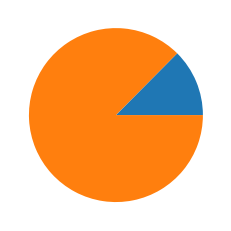

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
df = pd.read_csv('enem_2019_sao_paulo.csv')

# Coluna de interesse
target_serie = df['TP_COR_RACA']

## Porcentagem autodeclarada "Preta"
percent_preta = target_serie.value_counts(normalize=True)[2]

## Porcentagem não autodeclarada "Preta"
percent_nao_preta = 1 - percent_preta

## Valores (x) para o gráfico
x = [percent_preta, percent_nao_preta]

# Criando o gráfico
plt.pie(x)

# Mostrando o gráfico
plt.show()

## Gráfico de pizza com mais propriedades

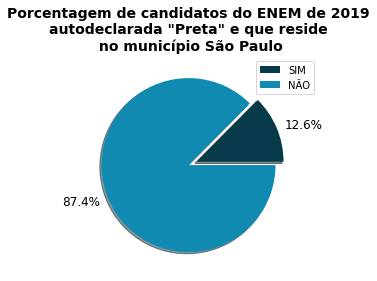

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
df = pd.read_csv('enem_2019_sao_paulo.csv')

# Coluna de interesse
target_serie = df['TP_COR_RACA']

# Porcentagem autodeclarada "Preta"
percent_preta_parda = target_serie.value_counts(normalize=True)[2]

# Porcentagem não autodeclarada "Preta"
percent_nao_preta = 1 - percent_preta

# Valores (x) para o gráfico
x = [percent_preta, percent_nao_preta]

# Criando o gráfico com mais propriedades
plt.pie(x,                                            # Valores
    labels=["{:.1f}%".format(100*percent_preta),      # Rótulo do 1º setor
            "{:.1f}%".format(100*percent_nao_preta)], # Rótulo do 2º setor
    colors=["#073B4C", "#118AB2"],                    # Cores respectivas dos setores
    shadow=True,                                      # Sombra no gráfico
    explode=[0.1,0],                                  # Destacando o 1º setor
    textprops={                                       # Propriedades do texto dos rótulos
        "fontsize":12                                 # Fonte de tamanho 12
    }
)

# Propriedades gerais

## Título
plt.title(
    "Porcentagem de candidatos do ENEM de 2019\nautodeclarada \"Preta\" e que reside\n no município São Paulo", # Texto
    fontsize=14,                                       # Fonte de tamanho 12
    fontweight='bold'                                  # Fonte em negrito
)
## Legenda
plt.legend(
    ["SIM", "NÃO"],                                    # Texto
    bbox_to_anchor=(0.6, 0, 0.5, 1),                   # Posição
    prop={                                             # Outras propriedades 
        "size": 'medium',                              # Fonte de tamanho médio
    }
)

# Mostrando o gráfico
plt.show()

<b>Possível conclusão:</b> 

Segundo censo do IBGE de 2010, 6,4% da população do município de São Paulo é autodeclarada "Preta" (<a href="https://www.prefeitura.sp.gov.br/cidade/secretarias/upload/igualdade_racial/arquivos/Relatorio_Final_Virtual.pdf">fonte</a>).

Considerando apenas a população que reside no município de São Paulo, se a porcentagem divulgada no censo de 2010 se manteve em 2019, podemos concluir que a porcentagem de candidatos autodeclarada "Preta" no ENEM de 2019 é maior que a porcentagem da população autodeclarada "Preta".

## Gráfico de barras básico

Qual porcentagem por sexo de candidatos residentes em São Paulo fizeram o ENEM em 2019?

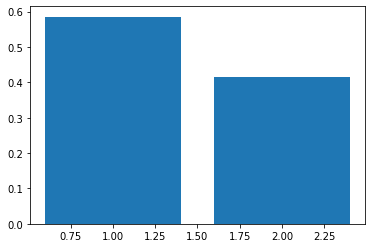

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
df = pd.read_csv('enem_2019_sao_paulo.csv')

# Coluna de interesse
target_serie = df['TP_SEXO']

# Posições das barras (x)
x = [1, 2]

# Porcentagens de estudantes por sexo (height)
female_sex = target_serie.value_counts(normalize=True)['F']
male_sex = target_serie.value_counts(normalize=True)['M']
height = [female_sex, male_sex]

# Criando o gráfico
plt.bar(x, height)

# Mostrando o gráfico
plt.show()

## Gráfico de barras com mais propriedades

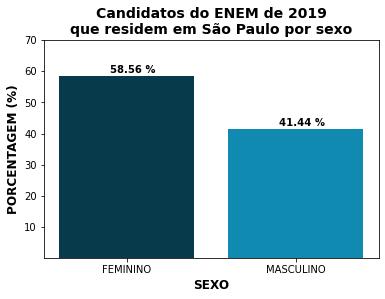

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
df = pd.read_csv('enem_2019_sao_paulo.csv')

# Coluna de interesse
target_serie = df['TP_SEXO']

# Posições das barras (x)
x = [1, 2]

# Porcentagens de estudantes por sexo (height)
female_sex = target_serie.value_counts(normalize=True)['F']
male_sex = target_serie.value_counts(normalize=True)['M']
height = [female_sex, male_sex]

# Criando o gráfico
plt.bar(x, height,
    color=["#073B4C", "#118AB2"],         # Cores das barras
    tick_label=["FEMININO", "MASCULINO"], # Rótulo das barras
)

# Propriedades gerais

## Título
plt.title(
    "Candidatos do ENEM de 2019\nque residem em São Paulo por sexo", # texto
    fontsize=14,                         # Fonte de tamanho 14
    fontweight='bold'                    # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "SEXO",                              # Texto
    fontsize=12,                         # Fonte de tamanho 12
    fontweight='bold'                    # Fonte em negrito
)

## Rótulo do eixo vertical
plt.ylabel(
    "PORCENTAGEM (%)",                  # Texto
    fontsize=12,                        # Fonte de tamanho 12
    fontweight='bold'                   # Fonte em negrito    
)

## Marcações do eixo vertical
positions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
label_positions = list(map(lambda x: int(100*x), positions))
plt.yticks(positions, label_positions)

## Valores nas barras
plt.text(0.9, female_sex + 0.02, "{:.2f} %".format(100*female_sex), # Posição
         va='center',                                               # Alinhamento centralizado
         fontweight='bold'                                          # Fonte em negrito
)
plt.text(1.9, male_sex + 0.02, "{:.2f} %".format(100*male_sex),     # Posição
         va='center',                                               # Alinhamento centralizado
         fontweight='bold'                                          # Fonte em negrito
)

# Mostrando o gráfico
plt.show()

<b>Conclusões:</b>

Em 2010, o município de São Paulo tinha 10.657.264 (47,4%) habitantes do sexo masculino e 11.849.742 (52,6%) habitantes do sexo feminino (<a href="">fonte</a>).

Observe que, dentre os residentes da cidade São Paulo que candidataram ao ENEM 2019, 58,56% eram do sexo feminino e 41,44% eram do sexo masculino.

Se a proporção por sexo se manteve de 2010 à 2019, é possível afirmar que há muito mais candidatos do sexo feminino do que do sexo masculino se candidatando ao ENEM, uma vez que há mais homens residentes em São Paulo.

## Gráfico de linha básico

Queremos saber dessa vez a nota média por idade dos candidatos.

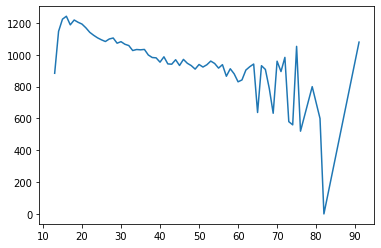

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
df = pd.read_csv('enem_2019_sao_paulo.csv')

# Criaremos uma nova coluna chamada nota total
df['NOTA_TOTAL'] = (df['NU_NOTA_COMP1'] + df['NU_NOTA_COMP2']
    + df['NU_NOTA_COMP3'] + df['NU_NOTA_COMP4'] 
    + df['NU_NOTA_COMP5']+df['NU_NOTA_REDACAO'])

# Consideraremos apenas as linhas cuja nota total seja não nula
df = df[df['NOTA_TOTAL'].notna()]

# Agruparemos os candidatos de mesma idade considerando a média da NOTA_TOTAL
df = df[['NOTA_TOTAL', 'NU_IDADE']].groupby('NU_IDADE').mean().reset_index()
df.columns=['NU_IDADE', 'NOTA_TOTAL_MEDIA']

# Valores das idades (x)
x = df['NU_IDADE']

# Valores das notas (y)
y = df['NOTA_TOTAL_MEDIA']

# Criando o gráfico
plt.plot(x, y)

# Mostrando o gráfico
plt.show()

## Gráfico de linha com mais propriedades

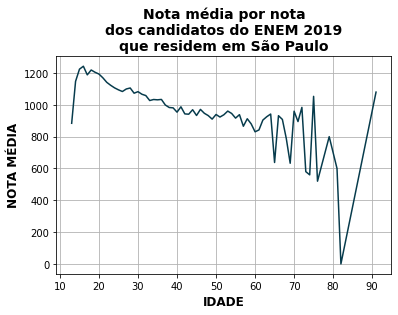

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
df = pd.read_csv('enem_2019_sao_paulo.csv')

# Criaremos uma nova coluna chamada nota total
df['NOTA_TOTAL'] = (df['NU_NOTA_COMP1'] + df['NU_NOTA_COMP2']
    + df['NU_NOTA_COMP3'] + df['NU_NOTA_COMP4'] 
    + df['NU_NOTA_COMP5']+df['NU_NOTA_REDACAO'])

# Consideraremos apenas as linhas cuja nota total seja não nula
df = df[df['NOTA_TOTAL'].notna()]

# Agruparemos os candidatos de mesma idade considerando a média da NOTA_TOTAL
df = df[['NOTA_TOTAL', 'NU_IDADE']].groupby('NU_IDADE').mean().reset_index()
df.columns=['NU_IDADE', 'NOTA_TOTAL_MEDIA']

# Valores das idades (x)
x = df['NU_IDADE']

# Valores das notas (y)
y = df['NOTA_TOTAL_MEDIA']

# Criando o gráfico
plt.plot(x, y,
    color="#073b4c", # Cor
)

# Propriedades gerais

## Título
plt.title(
    "Nota média por nota\ndos candidatos do ENEM 2019\nque residem em São Paulo", # Texto
    fontsize=14,                   # Fonte de tamanho 14
    fontweight='bold'              # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "IDADE",                       # Texto
    fontsize=12,                   # Fonte de tamanho 12
    fontweight='bold'              # Fonte em negrito 
)

## Rótulo do eixo vertical
plt.ylabel(
    "NOTA MÉDIA",                 # Texto
    fontsize=12,                  # Fonte de tamanho 12
    fontweight='bold'             # Fonte em negrito
)

## Grade
plt.grid('on')

# Mostrando o gráfico
plt.show()

Apenas um candidato tinha acima de 90 anos e sua nota foi relativamente alta. Numa regressão linear ele pode puxar o coeficiente angular para cima, portanto removeremos este candidato da análise.

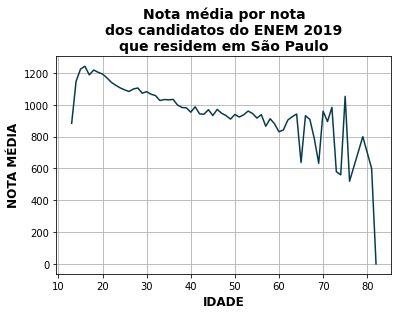

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
df = pd.read_csv('enem_2019_sao_paulo.csv')

# Removendo outlier
df = df[df['NU_IDADE'] < 90]

# Criaremos uma nova coluna chamada nota total
df['NOTA_TOTAL'] = (df['NU_NOTA_COMP1'] + df['NU_NOTA_COMP2']
    + df['NU_NOTA_COMP3'] + df['NU_NOTA_COMP4'] 
    + df['NU_NOTA_COMP5']+df['NU_NOTA_REDACAO'])

# Consideraremos apenas as linhas cuja nota total seja não nula
df = df[df['NOTA_TOTAL'].notna()]

# Agruparemos os candidatos de mesma idade considerando a média da NOTA_TOTAL
df = df[['NOTA_TOTAL', 'NU_IDADE']].groupby('NU_IDADE').mean().reset_index()
df.columns=['NU_IDADE', 'NOTA_TOTAL_MEDIA']

# Valores das idades (x)
x = df['NU_IDADE']

# Valores das notas (y)
y = df['NOTA_TOTAL_MEDIA']

# Criando o gráfico
plt.plot(x, y,
    color="#073b4c", # Cor
)

# Propriedades gerais

## Título
plt.title(
    "Nota média por nota\ndos candidatos do ENEM 2019\nque residem em São Paulo", # Texto
    fontsize=14,                   # Fonte de tamanho 14
    fontweight='bold'              # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "IDADE",                       # Texto
    fontsize=12,                   # Fonte de tamanho 12
    fontweight='bold'              # Fonte em negrito 
)

## Rótulo do eixo vertical
plt.ylabel(
    "NOTA MÉDIA",                 # Texto
    fontsize=12,                  # Fonte de tamanho 12
    fontweight='bold'             # Fonte em negrito
)

## Grade
plt.grid('on')

# Mostrando o gráfico
plt.show()

Parece que a média decresce com a idade. Qual a taxa de descrecimento?

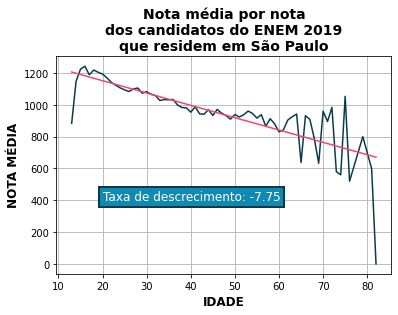

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Carregando os dados
df = pd.read_csv('enem_2019_sao_paulo.csv')

# Removendo outlier
df = df[df['NU_IDADE'] < 90]

# Criaremos uma nova coluna chamada nota total
df['NOTA_TOTAL'] = (df['NU_NOTA_COMP1'] + df['NU_NOTA_COMP2']
    + df['NU_NOTA_COMP3'] + df['NU_NOTA_COMP4'] 
    + df['NU_NOTA_COMP5']+df['NU_NOTA_REDACAO'])

# Consideraremos apenas as linhas cuja nota total seja não nula
df = df[df['NOTA_TOTAL'].notna()]

# Agruparemos os candidatos de mesma idade considerando a média da NOTA_TOTAL
df = df[['NOTA_TOTAL', 'NU_IDADE']].groupby('NU_IDADE').mean().reset_index()
df.columns=['NU_IDADE', 'NOTA_TOTAL_MEDIA']

# Valores das idades (x)
x = df['NU_IDADE']

# Valores das notas (y)
y = df['NOTA_TOTAL_MEDIA']

# Criando o gráfico
plt.plot(x, y,
    color="#073b4c",                # Cor
)

# Regressão Linear
model = LinearRegression().fit(x.values.reshape(-1, 1), y)

x_min = df['NU_IDADE'].min()
y_min = model.intercept_ + model.coef_ * x_min
x_max = df['NU_IDADE'].max()
y_max = model.intercept_ + model.coef_ * x_max

plt.plot([x_min, x_max], [y_min, y_max],
    color="#EF476F"        
)

# Propriedades gerais

## Título
plt.title(
    "Nota média por nota\ndos candidatos do ENEM 2019\nque residem em São Paulo", # Texto
    fontsize=14,                   # Fonte de tamanho 14
    fontweight='bold'              # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "IDADE",                       # Texto
    fontsize=12,                   # Fonte de tamanho 12
    fontweight='bold'              # Fonte em negrito 
)

## Rótulo do eixo vertical
plt.ylabel(
    "NOTA MÉDIA",                 # Texto
    fontsize=12,                  # Fonte de tamanho 12
    fontweight='bold'             # Fonte em negrito
)

## Anotações
plt.annotate(
    "Taxa de descrecimento: {:.2f}".format(model.coef_[0]),  # Texto
    xy=(20,400),                                             # Posição
    size=12,                                                 # Fonte de tamanho 12
    color='w',                                               # Fonte de cor branca
    bbox=dict(                        # Formatação da caixa
        boxstyle="square,pad=0.3",              # Quadrada com espaço interno de 0.3
        fc="#118AB2",                           # Cor de fundo
        ec="#073B4C",                           # Cor de borda
        lw=2                                    # Espessura da borda
    )
)


## Grade
plt.grid('on')

# Mostrando o gráfico
plt.show()

<b>Conclusão:</b>

As notas dos candidatos, de uma forma geral, diminuem a medida que a idade aumenta.

As notas dos candidatos cai 7,75 pontos por ano de vida.

Se incluir o candidato com idade acima de 90 a taxa de descrescimento é de -6.98.

Devemos investir em educação para as pessoas com idade mais elevada, não só para jovens! Educação é importante em todas as idades.

## Gráfico de dispersão simples

A mesma análise feita com linha, pode ser feita com dispersão.

Basta trocar plot por scatter.

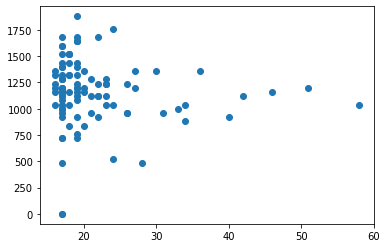

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
df = pd.read_csv('enem_2019_sao_paulo.csv')

# Removendo outlier (opcional)
# df = df[df['NU_IDADE'] < 90]

# Criaremos uma nova coluna chamada nota total
df['NOTA_TOTAL'] = (df['NU_NOTA_COMP1'] + df['NU_NOTA_COMP2']
    + df['NU_NOTA_COMP3'] + df['NU_NOTA_COMP4'] 
    + df['NU_NOTA_COMP5']+df['NU_NOTA_REDACAO'])

# Consideraremos apenas as linhas cuja nota total e a idade sejam não nulas
df = df[df['NOTA_TOTAL'].notna()]
df = df[df['NU_IDADE'].notna()]

# Considerar apenas uma amostra com 100 unidades amostrais
df = df.sample(100)

# Valores das idades (x)
x = df['NU_IDADE']

# Valores das notas (y)
y = df['NOTA_TOTAL']

# Criando o gráfico
plt.scatter(x, y)

# Mostrando o gráfico
plt.show()

## Gráfico de dispersão com mais propriedades

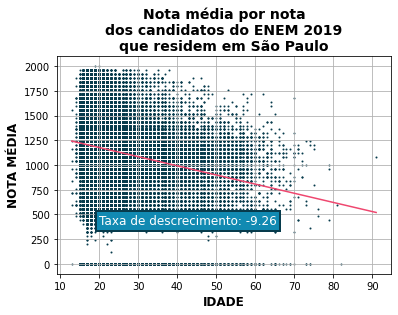

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Carregando os dados
df = pd.read_csv('enem_2019_sao_paulo.csv')

# Removendo outlier (opcional)
# df = df[df['NU_IDADE'] < 90]

# Criaremos uma nova coluna chamada nota total
df['NOTA_TOTAL'] = (df['NU_NOTA_COMP1'] + df['NU_NOTA_COMP2']
    + df['NU_NOTA_COMP3'] + df['NU_NOTA_COMP4'] 
    + df['NU_NOTA_COMP5']+df['NU_NOTA_REDACAO'])

# Consideraremos apenas as linhas cuja nota total seja não nula
df = df[df['NOTA_TOTAL'].notna()]
df = df[df['NU_IDADE'].notna()]

# Valores das idades (x)
x = df['NU_IDADE']

# Valores das notas (y)
y = df['NOTA_TOTAL']

model = LinearRegression().fit(x.values.reshape(-1, 1), y)

x_min = df['NU_IDADE'].min()
y_min = model.intercept_ + model.coef_ * x_min
x_max = df['NU_IDADE'].max()
y_max = model.intercept_ + model.coef_ * x_max
 
# Criando o gráfico
plt.scatter(x, y,
    color="#073b4c",                # Cor
    s=1                             # Tamanho dos pontos
)

# Regressão Linear
model = LinearRegression().fit(x.values.reshape(-1, 1), y)

x_min = df['NU_IDADE'].min()
y_min = model.intercept_ + model.coef_ * x_min
x_max = df['NU_IDADE'].max()
y_max = model.intercept_ + model.coef_ * x_max

plt.plot([x_min, x_max], [y_min, y_max],
    color="#EF476F"        
)

# Propriedades gerais

## Título
plt.title(
    "Nota média por nota\ndos candidatos do ENEM 2019\nque residem em São Paulo", # Texto
    fontsize=14,                   # Fonte de tamanho 14
    fontweight='bold'              # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "IDADE",                       # Texto
    fontsize=12,                   # Fonte de tamanho 12
    fontweight='bold'              # Fonte em negrito 
)

## Rótulo do eixo vertical
plt.ylabel(
    "NOTA MÉDIA",                 # Texto
    fontsize=12,                  # Fonte de tamanho 12
    fontweight='bold'             # Fonte em negrito
)

## Anotações
plt.annotate(
    "Taxa de descrecimento: {:.2f}".format(model.coef_[0]),  # Texto
    xy=(20,400),                                             # Posição
    size=12,                                                 # Fonte de tamanho 12
    color='w',                                               # Fonte de cor branca
    bbox=dict(                        # Formatação da caixa
        boxstyle="square,pad=0.3",              # Quadrada com espaço interno de 0.3
        fc="#118AB2",                           # Cor de fundo
        ec="#073B4C",                           # Cor de borda
        lw=2                                    # Espessura da borda
    )
)


## Grade
plt.grid('on')

# Mostrando o gráfico
plt.show()

<b>Conclusão</b>

Dados agregados sempre escondem algumas coisas.

Observe que agora podemos ver vários outliers.

Podemos ver também que muita gente tirou zero.

Podemos ver que a nota máxima chega a 2000.

A taxa de descrecimento da nota por candidato é ainda menor, incluindo o outlier com idade acima de 90 anos, que deveria jogar a taxa para cima. No entanto, ele não influencia tanto na análise, uma vez que os dados não estão agregados e há uma quantidade maior de dados representativos do que outliers.

## Boxplot Básico

Outra pergunta: Qual a nota mediana por renda dos candidatos ao ENEM 2019 que residem em São Paulo?

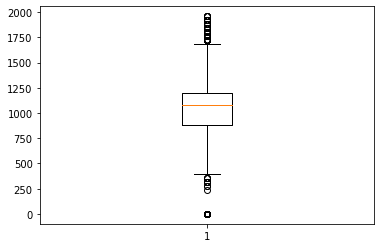

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
df = pd.read_csv('enem_2019_sao_paulo.csv')

# Criaremos uma nova coluna chamada nota total
df['NOTA_TOTAL'] = (df['NU_NOTA_COMP1'] + df['NU_NOTA_COMP2']
    + df['NU_NOTA_COMP3'] + df['NU_NOTA_COMP4'] 
    + df['NU_NOTA_COMP5']+df['NU_NOTA_REDACAO'])

# Consideraremos apenas as linhas cuja nota total seja não nula
df = df[df['NOTA_TOTAL'].notna()]

# Notas totais (x) dos candidatos cuja renda familiar é inferior a R$998,00
x = df[df['Q006'] == 'B']['NOTA_TOTAL']

# Criando o gráfico
plt.boxplot(x)

# Mostrando o gráfico
plt.show()

## Múltiplos boxplots

Queremos fazer vários boxplots para comparar as notas das várias rendas.

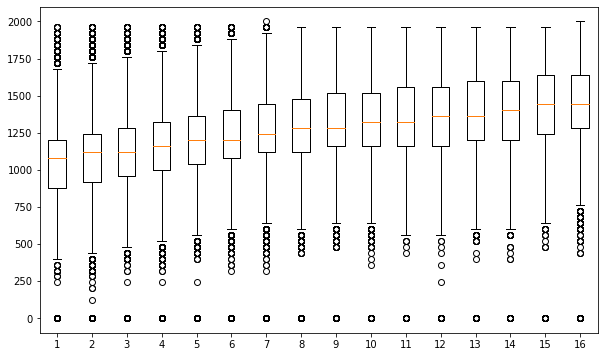

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Dessa fez vamos precisar de um gráfico maior
plt.figure(figsize=(10,6))

# Carregando os dados
df = pd.read_csv('enem_2019_sao_paulo.csv')

# Criaremos uma nova coluna chamada nota total
df['NOTA_TOTAL'] = (df['NU_NOTA_COMP1'] + df['NU_NOTA_COMP2']
    + df['NU_NOTA_COMP3'] + df['NU_NOTA_COMP4'] 
    + df['NU_NOTA_COMP5']+df['NU_NOTA_REDACAO'])

# Consideraremos apenas as linhas cuja nota total seja não nula
df = df[df['NOTA_TOTAL'].notna()]

# Notas totais (x) dos candidatos cuja renda familiar é inferior a R$998,00
xs = []
ys = []
for letter in sorted(df['Q006'].unique())[1:]:
    xs.append(df[df['Q006'] == letter]['NOTA_TOTAL'].values)

# Criando o gráfico
plt.boxplot(xs)

# Mostrando o gráfico
plt.show()

## Boxplot com mais propriedades

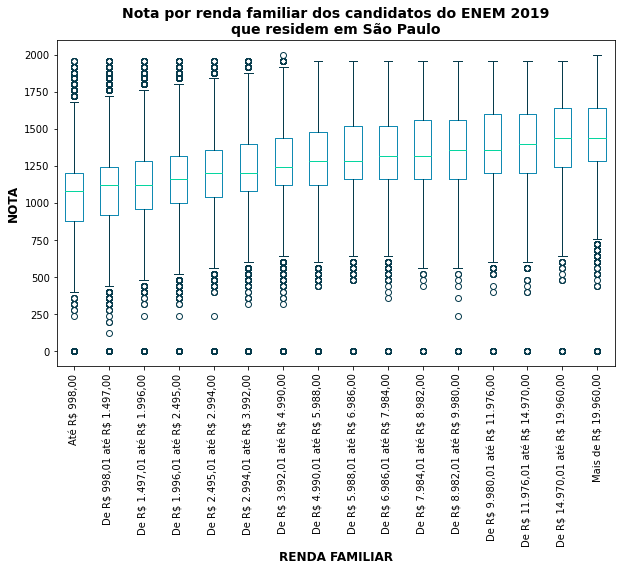

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Dessa fez vamos precisar de um gráfico maior
plt.figure(figsize=(10,6))

# Carregando os dados
df = pd.read_csv('enem_2019_sao_paulo.csv')

# Criaremos uma nova coluna chamada nota total
df['NOTA_TOTAL'] = (df['NU_NOTA_COMP1'] + df['NU_NOTA_COMP2']
    + df['NU_NOTA_COMP3'] + df['NU_NOTA_COMP4'] 
    + df['NU_NOTA_COMP5']+df['NU_NOTA_REDACAO'])

# Consideraremos apenas as linhas cuja nota total seja não nula
df = df[df['NOTA_TOTAL'].notna()]

# Notas totais (x) dos candidatos cuja renda familiar é inferior a R$998,00
xs = []
ys = []
for letter in sorted(df['Q006'].unique())[1:]:
    xs.append(df[df['Q006'] == letter]['NOTA_TOTAL'].values)

# Criando o gráfico
plt.boxplot(xs,
    boxprops=dict(color="#118AB2"),                               # Caixa
    capprops=dict(color="#073B4C"),                               # Linha horizontal
    whiskerprops=dict(color="#073B4C"),                           # Linha vertical
    flierprops=dict(color="#118AB2", markeredgecolor="#073B4C"),  # Outliers
    medianprops=dict(color="#06D6A0"),                            # Mediana
)

# Propriedades gerais
## Título
plt.title(
    "Nota por renda familiar dos candidatos do ENEM 2019\nque residem em São Paulo", # texto
    fontsize=14, # tamanho da font
    fontweight='bold' # colocando em negrito
)
## Rótulo do eixo horizontal
plt.xlabel(
    "RENDA FAMILIAR", # texto
    fontsize=12, # tamanho da font
    fontweight='bold' # colocando em negrito    
)
## Rótulo do eixo vertical
plt.ylabel(
    "NOTA", # texto
    fontsize=12, # tamanho da font
    fontweight='bold' # colocando em negrito    
)

## Marcações do eixo horizontal
plt.xticks(list(range(1,17)), [
    'Até R\$ 998,00',
    'De R\$ 998,01 até R\$ 1.497,00',
    'De R\$ 1.497,01 até R\$ 1.996,00',
    'De R\$ 1.996,01 até R\$ 2.495,00',
    'De R\$ 2.495,01 até R\$ 2.994,00',
    'De R\$ 2.994,01 até R\$ 3.992,00',
    'De R\$ 3.992,01 até R\$ 4.990,00',
    'De R\$ 4.990,01 até R\$ 5.988,00',
    'De R\$ 5.988,01 até R$ 6.986,00',
    'De R\$ 6.986,01 até R\$ 7.984,00',
    'De R\$ 7.984,01 até R\$ 8.982,00',
    'De R\$ 8.982,01 até R\$ 9.980,00',
    'De R\$ 9.980,01 até R\$ 11.976,00',
    'De R\$ 11.976,01 até R\$ 14.970,00',
    'De R\$ 14.970,01 até R\$ 19.960,00',
    'Mais de R\$ 19.960,00'
], rotation=90, fontsize=10)

plt.show()

<b>Conclusão:</b>

A mediana das notas aumenta quando a renda familiar aumenta.

Notas altas, consideradas outliers, acontecem com maior frequência quando a renda baixa.

Notas baixas, consideradas outliers, acontecem sempre.

Podemos concluir:

- Não é comum notas altas se a renda familiar é baixa
- Acima de 4,990 reais, não é comum notas mais baixas, porém notas mais altas não são outliers.
- A mediana cresce a medida que a renda familiar cresce.

Ouch, temos aí muitos exemplos de uma falta de inclusão na educação!